
Resultados con ajuste automático de hiperparámetros:
Mejores parámetros: {'C': 100, 'solver': 'liblinear'}
Mejor Accuracy en validación cruzada: 99.98%
Accuracy: 99.99%
Precision: 99.99%
Recall: 99.98%
F1-Score: 99.99%
AUC-ROC: 100.00%


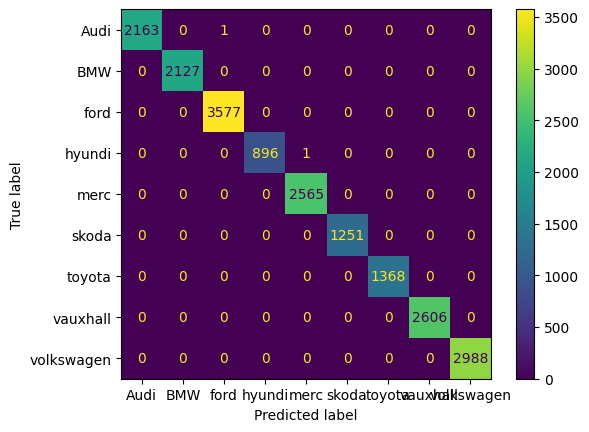

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
import matplotlib.pyplot as plt


# Cargar datos
df = pd.read_csv("Cars export 2025-02-05 19-38-54.csv")


num_features = ["year", "price", "mileage", "tax", "mpg", "engineSize"]
cat_features = ["transmission", "fuelType", "model"]

# Preprocesador
"""
Lo que hace el ColumnTransformer
"""
preproceso = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

# Variables predictoras y objetivo
X = df[num_features + cat_features]
y = df["Manufacturer"]

# Aplicar preprocesamiento
X = preproceso.fit_transform(X)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Ajuste automático con GridSearchCV
parametros = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "solver": ["liblinear", "lbfgs"]
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), parametros, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\nResultados con ajuste automático de hiperparámetros:")
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor Accuracy en validación cruzada: {grid_search.best_score_ * 100:.2f}%")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred_best, average='macro') * 100:.2f}%")
print(f"Recall: {recall_score(y_test, y_pred_best, average='macro') * 100:.2f}%")
print(f"F1-Score: {f1_score(y_test, y_pred_best, average='macro') * 100:.2f}%")
print(f"AUC-ROC: {roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr') * 100:.2f}%")



# Matriz de confusión
matrix = ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.show()

